# **Đại học Tôn Đức Thắng**
Khoa Công nghệ thông tin
KHAI THÁC DỮ LIỆU VÀ KHAI PHÁ TRI THỨC - 505043
---
    Thành viên:
      Nguyễn Sang Sinh - 51900771
      Trần Hoàng Đăng - 51800850
      Võ Thị Kiều Viễn Đông - 51800855

## Task 1. (3 points) Collecting data

### 1. Choosing 60 stock symbols from Ho Chi Minh Stock Exchange (HOSE).

In [49]:
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd

In [50]:
stock_symbols = []
def get_stock_symbols_from_HOSE(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.text, 'html.parser')
  rows = soup.find_all('td',attrs={'class':'CodeItem'})

  for i in rows:
    row = i.find_all('a')
    stock_symbols.append(row[0].text.strip())

  del stock_symbols[59:-1]

  print(stock_symbols)
  print('Số stock symbol là:', len(stock_symbols))

In [51]:
url = 'https://s.cafef.vn/TraCuuLichSu2/3/HOSE/16/12/2021.chn'
get_stock_symbols_from_HOSE(url)

['STB', 'HPG', 'VRE', 'FLC', 'VIC', 'CTG', 'VNM', 'POW', 'TPB', 'DXS', 'HQC', 'TTF', 'SCR', 'VCB', 'BMI', 'HAX', 'HBC', 'VHM', 'HSG', 'PVD', 'HCM', 'FTM', 'DRC', 'BCM', 'BID', 'HVN', 'DLG', 'HHS', 'PLX', 'IJC', 'AMD', 'TV2', 'KDC', 'LDG', 'HAG', 'VSC', 'DCM', 'PHR', 'SAM', 'HDG', 'CKG', 'OGC', 'LHG', 'SZC', 'FCN', 'TCL', 'CRE', 'TNI', 'TLD', 'BVH', 'DRH', 'PLP', 'PGD', 'LCG', 'PDR', 'GVR', 'TDC', 'IDI', 'ADS', 'VPB']
Số stock symbol là: 60


### 2. Collecting the daily stock prices (closing prices) of those stock symbols in 2021.

In [52]:
def get_data(code, page):
    df = pd.DataFrame(columns=["Mã CK", "Ngày", "Giá đóng cửa"])
    URL = f"https://s.cafef.vn/Lich-su-giao-dich-{code}-1.chn"

    body = f"ctl00%24ContentPlaceHolder1%24scriptmanager=ctl00%24ContentPlaceHolder1%24ctl03%24panelAjax&ctl00%24ContentPlaceHolder1%24ctl03%24txtKeyword={code}&ctl00%24ContentPlaceHolder1%24ctl03%24dpkTradeDate1%24txtDatePicker=1%2F1%2F2021&ctl00%24ContentPlaceHolder1%24ctl03%24dpkTradeDate2%24txtDatePicker=&__EVENTTARGET=ctl00%24ContentPlaceHolder1%24ctl03%24pager2&__EVENTARGUMENT={page}&__VIEWSTATE=%2FwEPDwUKMTU2NzY0ODUyMGQYAQUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgEFKGN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkY3RsMDMkYnRTZWFyY2jJnyPYjjwDsOatyCQBZar0ZSQygQ%3D%3D&__VIEWSTATEGENERATOR=2E2252AF&__ASYNCPOST=true&"

    headers = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36",
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
    }

    resps = requests.post(URL, headers=headers, data=body)
    soup = BeautifulSoup(resps.content, 'html.parser')
    table = soup.find('table', id='GirdTable2').find_all('tr')[2:]


    for row in table:
        columns = row.find_all('td')

        df = df.append({
            "Mã CK": code,
            "Ngày": columns[0].get_text(),
            "Giá đóng cửa": columns[2].get_text()
        }, ignore_index=True)

    return df

In [53]:
def get_all_data(df_stock, code):
    df = pd.DataFrame(columns=["Mã CK", "Ngày", "Giá đóng cửa"])

    for i in (range(1, 14)):
        df_resp = get_data(page=i, code=code)
        if df_resp.empty:
            break
        df = pd.concat([
            df, df_resp
        ], ignore_index=True).reset_index(drop=True)

    df = df.drop_duplicates(subset="Ngày")
    df_stock[code] = df

In [54]:
df_stock = {}

for i in stock_symbols:
  get_all_data(df_stock, i)
print('Hoàn tất!')

Hoàn tất!


In [55]:
#Hàm đưa dữ liệu các stock thành 1 file csv thống nhất

def make_data(df_stock, stock_symbols):
  df = pd.DataFrame()
  days =  df_stock[stock_symbols[0]]['Ngày'][::-1]
  df = df.append(days)

  for symbol in stock_symbols:
    data_row = df_stock[symbol]['Giá đóng cửa'][::-1]
    data_row = data_row.rename(symbol)
    df = df.append(data_row)

  df.columns = df.iloc[0]
  df = df.iloc[:, ::-1] 
  df = df[1:]
  return df

In [56]:
#Tạo ouput_csv chứa thông tin giá đóng cửa - Mỗi mã stock chiếm 1 dòng
#Header là ngày giao dịch
output_path = 'data/'

if not os.path.exists(output_path):
    os.makedirs(output_path)

output_csv = make_data(df_stock, stock_symbols)
output_csv.to_csv(output_path + f'stock.csv', index=True)
output_csv[:9]

Ngày,04/01/2021,05/01/2021,06/01/2021,07/01/2021,08/01/2021,11/01/2021,12/01/2021,13/01/2021,14/01/2021,15/01/2021,18/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,25/01/2021,26/01/2021,27/01/2021,28/01/2021,29/01/2021,01/02/2021,02/02/2021,03/02/2021,04/02/2021,05/02/2021,08/02/2021,09/02/2021,17/02/2021,18/02/2021,19/02/2021,22/02/2021,23/02/2021,24/02/2021,25/02/2021,26/02/2021,01/03/2021,02/03/2021,03/03/2021,04/03/2021,05/03/2021,...,01/11/2021,02/11/2021,03/11/2021,04/11/2021,05/11/2021,08/11/2021,09/11/2021,10/11/2021,11/11/2021,12/11/2021,15/11/2021,16/11/2021,17/11/2021,18/11/2021,19/11/2021,22/11/2021,23/11/2021,24/11/2021,25/11/2021,26/11/2021,29/11/2021,30/11/2021,01/12/2021,02/12/2021,03/12/2021,06/12/2021,07/12/2021,08/12/2021,09/12/2021,10/12/2021,13/12/2021,14/12/2021,15/12/2021,16/12/2021,17/12/2021,20/12/2021,21/12/2021,22/12/2021,23/12/2021,24/12/2021
STB,17.55,17.70,18.00,18.45,19.40,20.10,19.80,19.50,20.10,21.10,20.60,19.20,19.00,20.00,19.95,19.35,18.10,17.25,16.05,16.90,16.10,17.15,18.00,17.60,18.30,17.40,18.15,18.75,18.60,18.70,18.60,18.80,18.35,18.50,18.35,19.10,19.15,19.00,18.35,18.70,...,26.60,26.65,27.90,27.45,27.65,27.85,28.10,28.45,27.70,28.10,27.95,28.05,28.00,27.65,27.90,28.80,28.50,30.45,30.65,30.85,29.90,28.90,29.90,29.30,28.00,27.00,28.05,28.60,28.85,28.60,28.65,28.10,28.35,28.60,28.30,28.65,28.20,27.65,27.40,28.20
HPG,42.30,42.35,42.80,42.80,42.75,43.05,44.90,44.70,44.45,44.50,44.60,41.60,41.70,44.20,43.65,43.70,42.30,40.30,37.50,39.15,38.35,40.50,42.00,41.80,42.50,40.90,41.80,43.45,43.85,43.45,43.40,43.30,43.60,44.15,45.60,46.20,46.70,46.80,45.90,46.00,...,55.70,55.50,55.60,56.30,56.60,56.80,56.50,55.30,54.00,54.60,53.60,52.00,51.40,49.95,48.00,48.65,49.55,48.65,49.25,49.05,48.40,48.95,49.00,48.60,47.70,45.75,47.60,47.20,47.10,46.50,46.55,47.70,47.80,47.50,46.70,46.90,46.10,45.10,44.95,46.05
VRE,31.65,33.30,33.20,33.90,35.50,37.15,36.70,36.20,36.60,36.70,37.35,37.30,36.80,36.60,36.90,37.80,37.00,34.45,32.05,32.05,30.00,31.95,33.10,32.60,32.70,30.90,31.55,33.75,34.85,34.50,34.15,34.40,33.70,33.75,33.20,34.25,34.70,35.50,34.55,34.55,...,31.15,30.85,31.70,31.55,31.20,30.85,30.40,30.90,30.30,30.10,30.20,30.05,30.45,31.10,30.50,29.90,30.15,31.10,30.85,30.40,30.15,29.80,29.70,29.65,28.10,28.00,29.95,30.10,30.45,30.35,30.45,30.20,30.40,30.10,30.80,31.05,31.40,31.50,31.00,31.25
FLC,4.60,4.49,4.39,4.43,4.44,4.75,5.02,4.91,4.93,5.18,5.54,5.28,5.13,5.48,5.86,6.27,6.70,7.15,6.65,6.19,5.76,6.16,6.20,6.10,6.52,6.10,6.39,6.70,6.30,6.08,6.32,6.15,6.05,6.10,6.29,6.50,6.10,6.52,6.55,6.30,...,12.45,12.70,12.20,12.20,12.55,13.20,13.20,13.00,13.70,13.90,14.85,14.45,14.60,15.60,16.50,15.50,14.70,14.80,15.70,15.15,15.05,14.65,15.50,15.00,14.60,14.55,14.70,14.90,15.30,15.00,16.05,15.80,16.30,17.40,17.00,17.95,18.00,18.55,17.50,17.55
VIC,108.00,109.70,110.20,110.10,111.80,113.80,114.40,111.10,110.40,111.20,110.30,102.70,103.30,105.10,105.00,104.80,101.50,100.00,93.00,99.40,99.00,105.90,107.50,105.00,107.50,101.00,106.20,108.00,110.00,109.00,109.70,110.00,108.20,108.90,109.00,108.50,108.20,106.90,106.90,106.30,...,95.80,95.80,95.30,95.00,95.00,94.90,94.90,94.90,94.80,94.50,95.00,94.80,96.30,94.50,94.80,94.80,94.80,94.10,94.00,98.50,105.30,105.00,106.00,107.20,105.50,105.60,106.70,105.90,107.00,103.10,103.20,102.50,100.00,100.00,102.00,99.00,98.10,99.60,96.00,96.50
CTG,35.50,35.40,37.85,38.85,38.70,38.70,38.50,38.65,39.15,39.50,38.60,35.90,35.65,37.00,37.60,36.80,34.50,32.60,30.35,30.50,32.00,33.90,34.90,34.70,35.80,34.05,35.40,36.80,36.80,37.00,37.00,37.05,37.50,37.30,37.25,38.10,38.00,38.60,38.30,38.00,...,32.20,32.40,33.00,32.60,32.70,32.80,32.95,32.50,31.95,32.70,32.50,32.40,32.25,32.15,32.80,34.50,34.10,35.40,35.15,34.30,34.25,33.55,34.00,33.80,33.00,32.10,32.70,33.00,33.75,33.55,33.50,32.40,32.25,32.50,32.95,32.45,32.00,31.65,32.20,32.90
VNM,109.30,110.80,109.80,110.40,112.00,115.90,116.30,114.50,113.10,113.90,113.30,107.70,109.00,110.30,108.70,108.20,106.70,103.30,96.10,102.80,102.70,106.40,109.70,108.80,

## Task 2. (2 points) Pre-processing 

In [57]:
!pip install tslearn

In [58]:
#Import thư viện tslearn và các hàm liên quan

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


In [59]:
#Hàm tiền xử lý dữ liệu - Scaler mean variance giá đóng cửa
#Thêm 1 cột 'giá scaler' vào từng mã stock

def pre_processing_scaler(df):
  price_old = np.array([df['Giá đóng cửa']], dtype=float)
  price_scaled = TimeSeriesScalerMeanVariance().fit_transform(price_old)
  temp = pd.DataFrame()
  for i in price_scaled[0]:
    temp = temp.append({
            "Giá scaler": "{:.2f}".format(i[0])
        }, ignore_index=True)
  
  result = pd.concat([df, temp], axis=1)
  return result

In [60]:
for symbol in stock_symbols:
    df_stock[symbol] = pre_processing_scaler(df_stock[symbol])

df_stock[stock_symbols[12]]

,Mã CK,Ngày,Giá đóng cửa,Giá scaler
0,SCR,24/12/2021,22.10,2.87
1,SCR,23/12/2021,22.00,2.84
2,SCR,22/12/2021,23.20,3.17
3,SCR,21/12/2021,22.75,3.04
4,SCR,20/12/2021,21.65,2.75
...,...,...,...,...
240,SCR,08/01/2021,9.48,-0.55
241,SCR,07/01/2021,9.29,-0.60
242,SCR,06/01/2021,9.10,-0.65
243,SCR,05/01/2021,9.10,-0.65


In [61]:
#Hàm vẽ giá đóng cửa và giá scaler của từng stock

def plot_price_stock(df):
  price_values = []
  price_values_scale = []
  days = df['Ngày'].values[::-1]

  for i in df['Giá đóng cửa'].values:
    price_values.append(float(i))

  for i in df['Giá scaler'].values:
    price_values_scale.append(float(i))

  price_values = price_values[::-1]
  price_values_scale = price_values_scale[::-1]

  new_x = [days[i] for i in range(240) if i % 45 == 0]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

  ax1.plot(2,2,1)
  ax1.plot(days, price_values, color='tab:green', label="Giá đóng cửa")
  ax1.set_xticks([i for i in range(240) if i % 45 == 0])
  ax1.set_xticklabels(new_x, rotation='horizontal', fontsize=18)
  ax1.set_ylim(min(price_values), max(price_values))
  ax1.legend(loc='upper left')
  ax1.set_title(df['Mã CK'][0] + " GIÁ ĐÓNG CỬA 2021")


  ax2.plot(2,2,2)
  ax2.plot(days, price_values_scale, color='tab:blue', label="Giá scaler")
  ax2.set_xticks([i for i in range(240) if i % 45 == 0])
  ax2.set_xticklabels(new_x, rotation='horizontal', fontsize=18)
  ax2.set_ylim(min(price_values_scale), max(price_values_scale))
  ax2.legend(loc='upper left')
  ax2.set_title(df['Mã CK'][0] + " GIÁ SCALER")



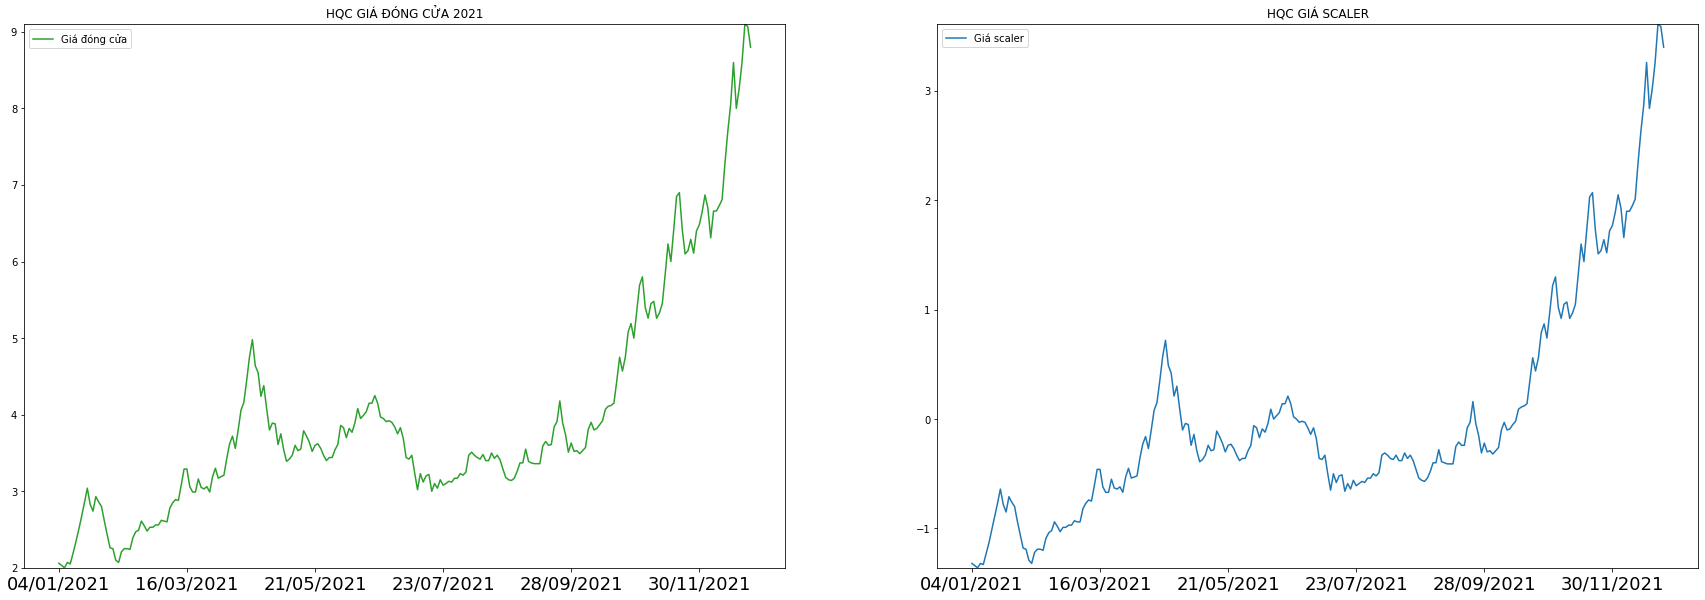

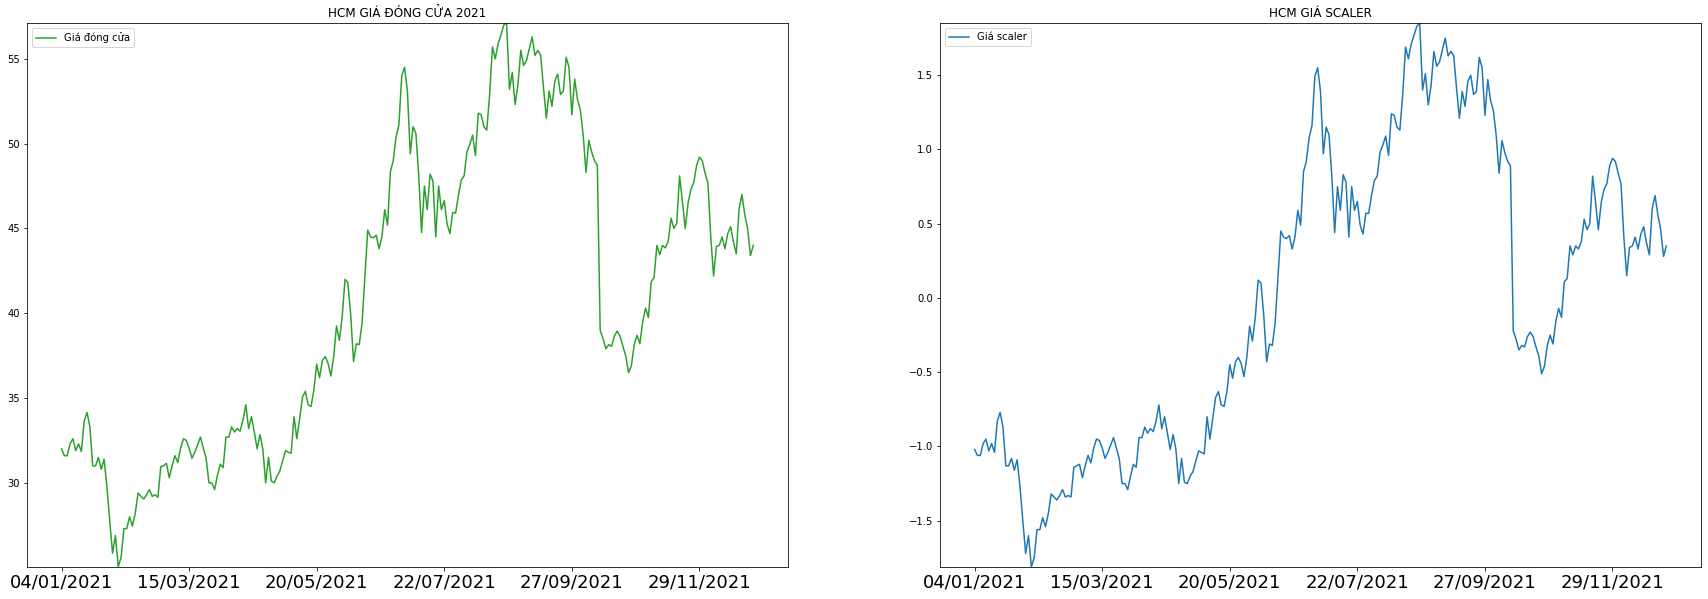

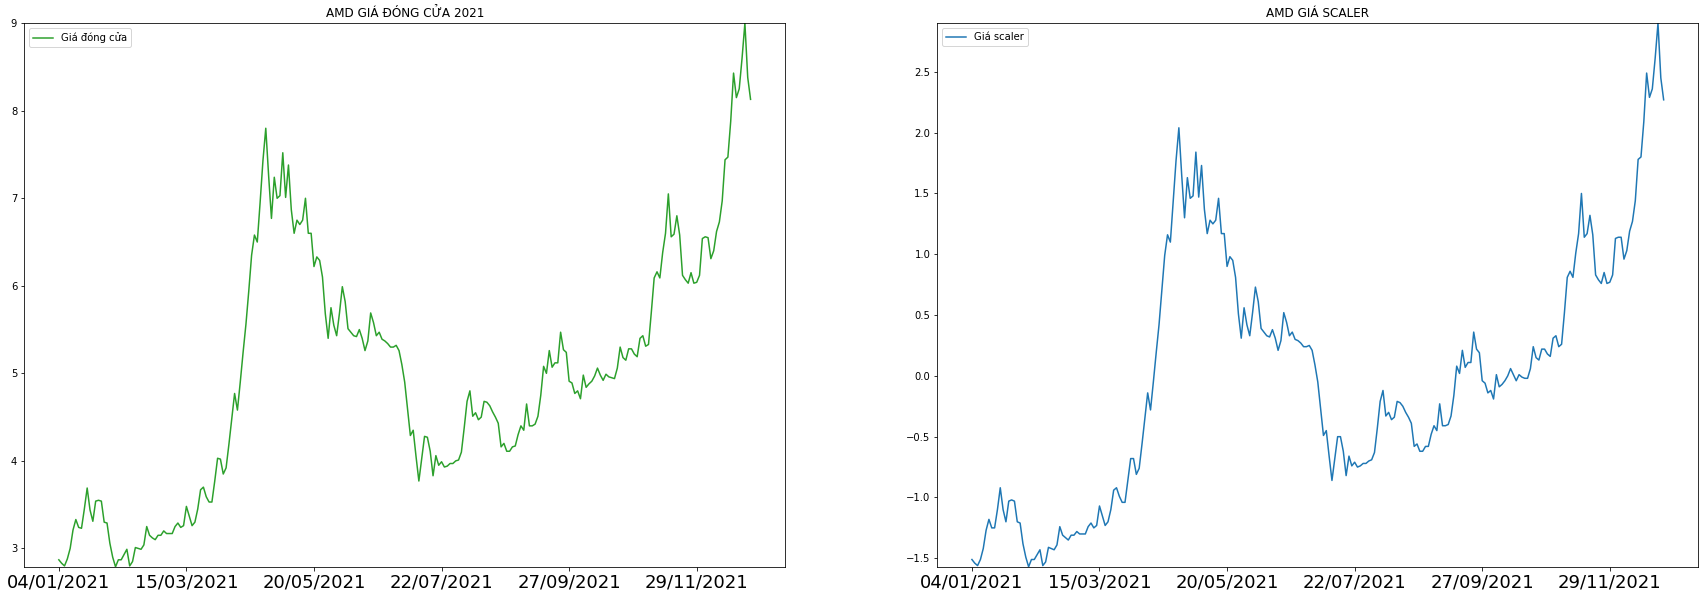

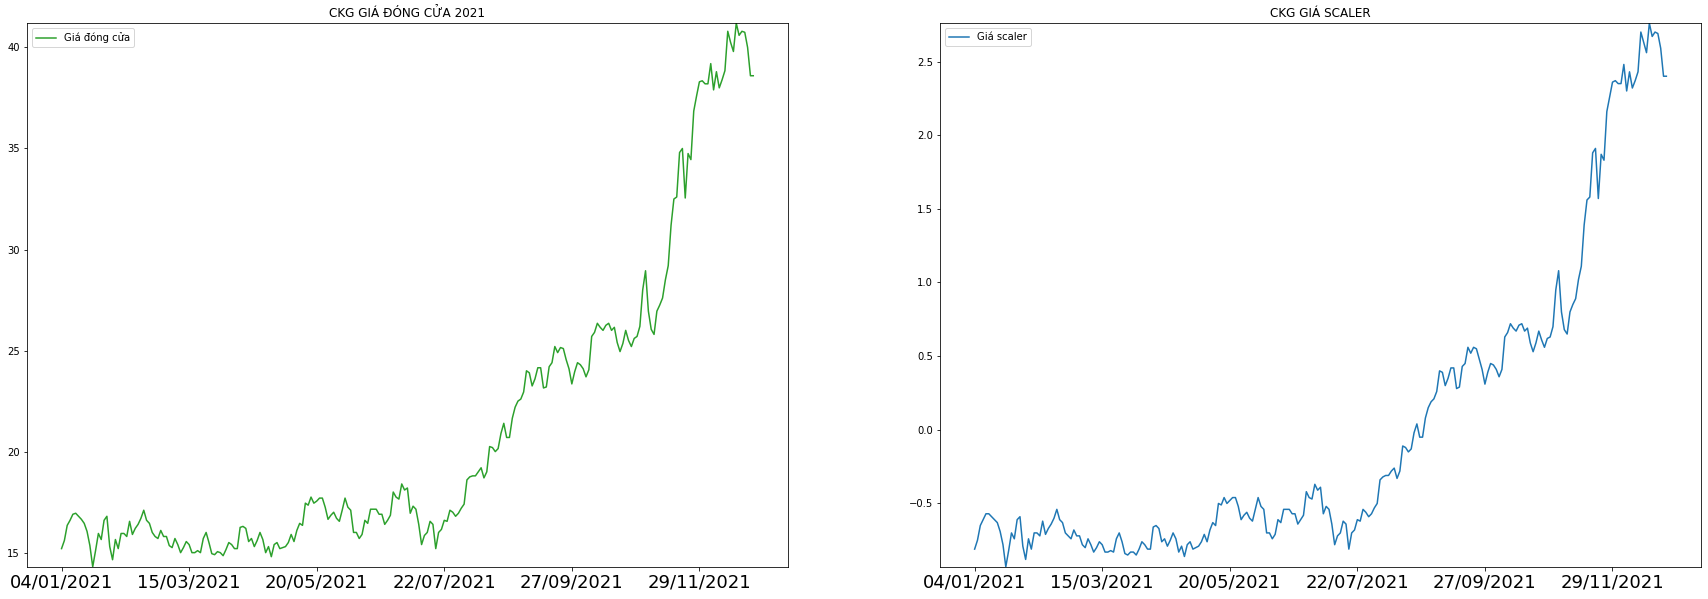

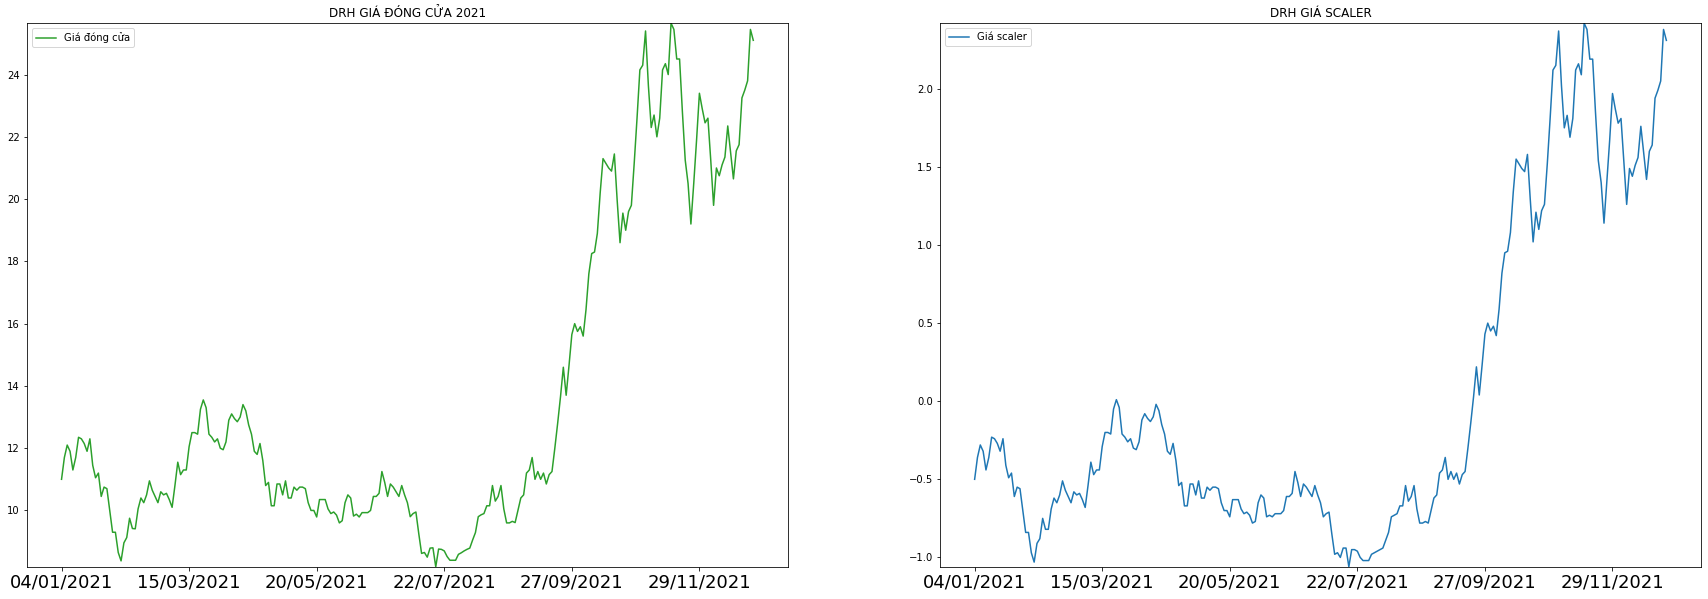

In [62]:
#Chọn index các mã stock và tiến hành plot
index_plot = [10, 20, 30, 40, 50]
for index in index_plot:
  plot_price_stock(df_stock[stock_symbols[index]])


## Task 2. Optional 

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


### MinMaxScaler

In [64]:
#Hàm tiền xử lý dữ liệu - Scaler mean variance giá đóng cửa

def pre_processing_option(df, method='MinMaxScaler'):
  price_old = np.array([df['Giá đóng cửa']], dtype=float)
  price_old = price_old.reshape((price_old[0].shape[0], 1))
  if (method == 'StandardScaler'):
    price_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(price_old)
  elif(method == 'MinMaxScaler'):
    price_scaled = StandardScaler().fit_transform(price_old)

  temp = pd.DataFrame()
  for i in price_scaled:
    temp = temp.append({
            "Giá " + method: "{:.2f}".format(i[0])
        }, ignore_index=True)
  
  result = pd.concat([df, temp], axis=1)
  return result

In [65]:
#Hàm vẽ giá đóng cửa và giá scaler của từng stock

def plot_price_stock(df, method='MinMaxScaler'):
  price_values = []
  price_values_scale = []
  days = df['Ngày'].values[::-1]

  for i in df['Giá đóng cửa'].values:
    price_values.append(float(i))

  for i in df["Giá " + method].values:
    price_values_scale.append(float(i))

  price_values = price_values[::-1]
  price_values_scale = price_values_scale[::-1]

  new_x = [days[i] for i in range(240) if i % 45 == 0]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

  ax1.plot(2,2,1)
  ax1.plot(days, price_values, color='tab:green', label="Giá đóng cửa")
  ax1.set_xticks([i for i in range(240) if i % 45 == 0])
  ax1.set_xticklabels(new_x, rotation='horizontal', fontsize=18)
  ax1.set_ylim(min(price_values), max(price_values))
  ax1.legend(loc='upper left')
  ax1.set_title(df['Mã CK'][0] + " GIÁ ĐÓNG CỬA 2021")


  ax2.plot(2,2,2)
  ax2.plot(days, price_values_scale, color='tab:blue', label="Giá " + method)
  ax2.set_xticks([i for i in range(240) if i % 45 == 0])
  ax2.set_xticklabels(new_x, rotation='horizontal', fontsize=18)
  ax2.set_ylim(min(price_values_scale), max(price_values_scale))
  ax2.legend(loc='upper left')
  ax2.set_title(df['Mã CK'][0] + " Giá " + method)



In [66]:
for symbol in stock_symbols:
    df_stock[symbol] = pre_processing_option(df_stock[symbol])


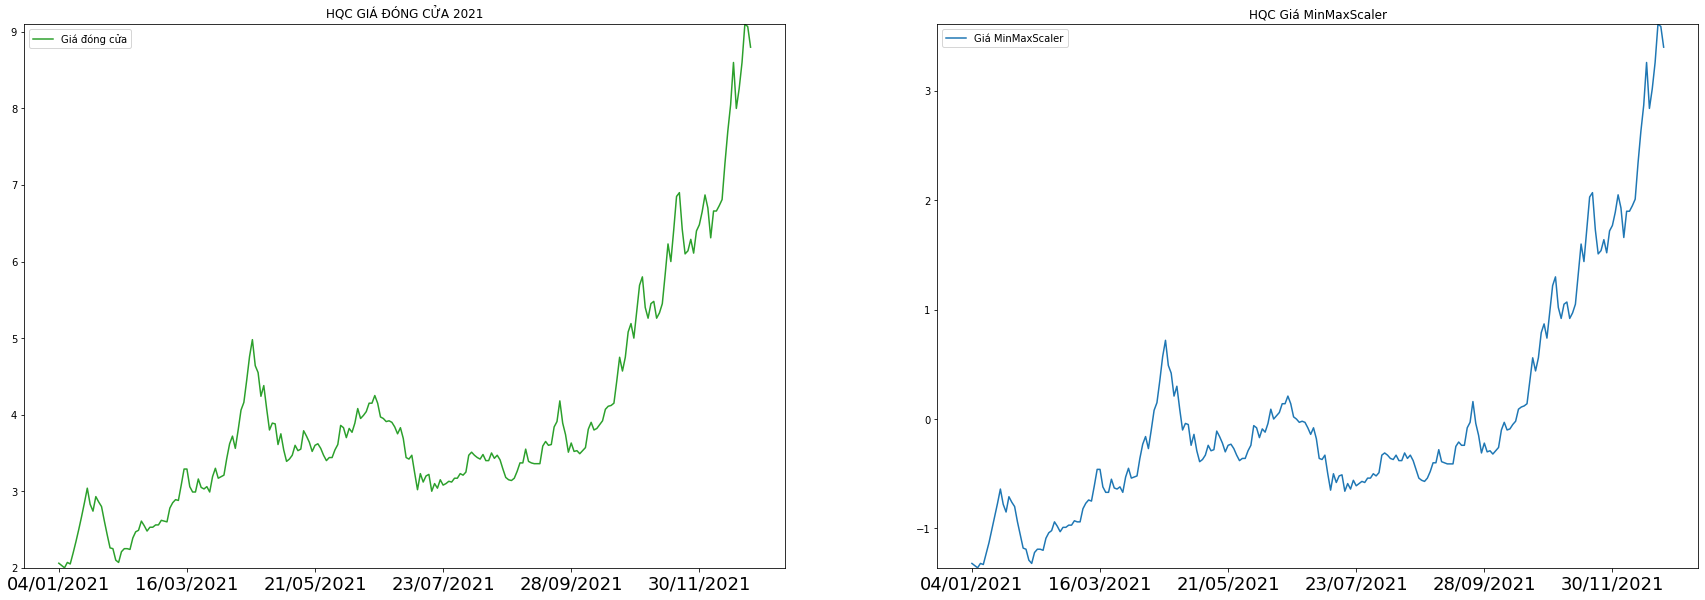

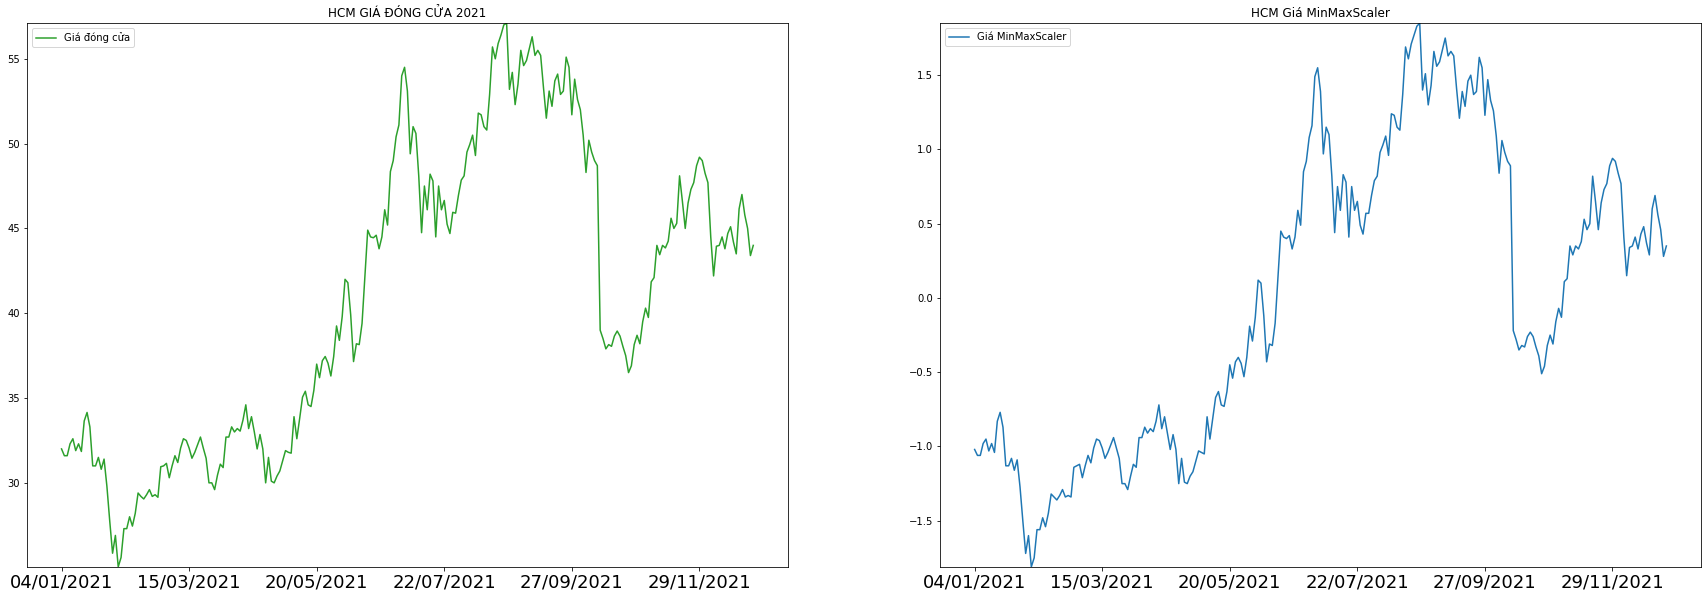

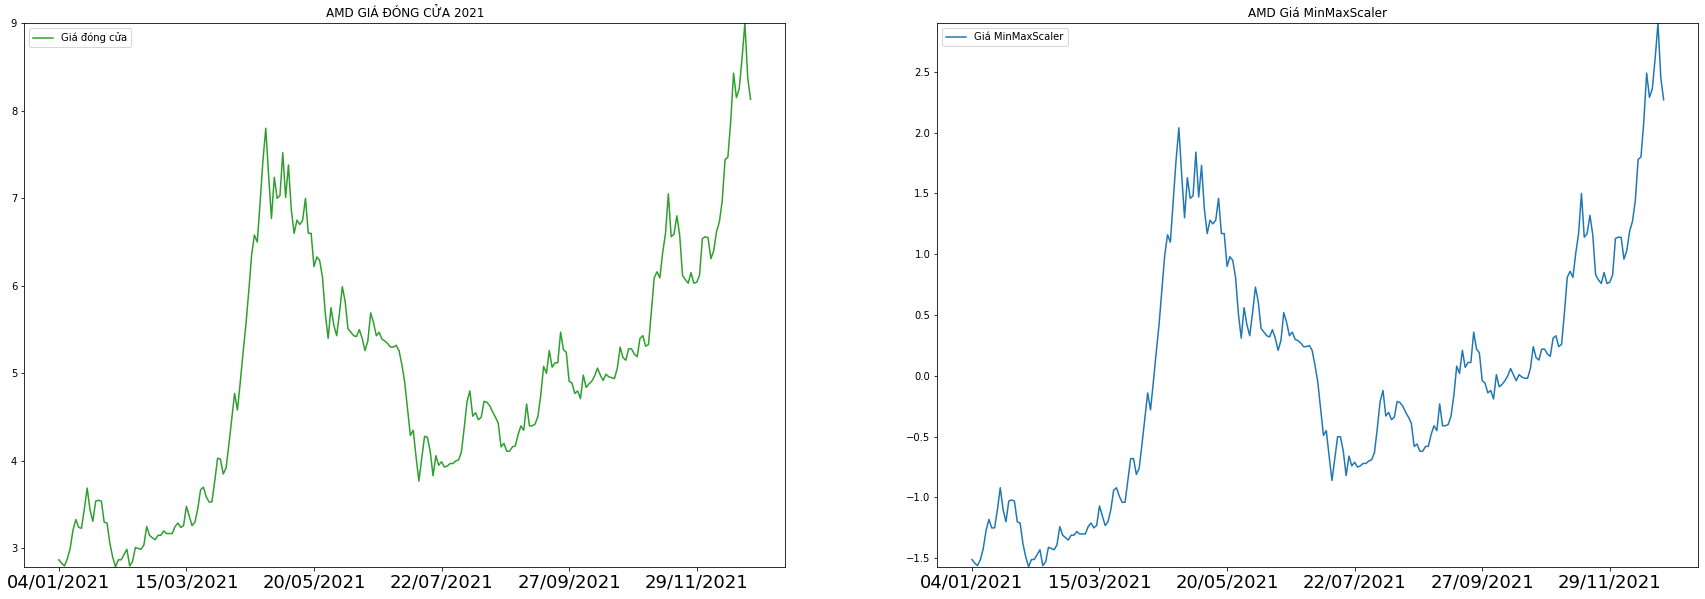

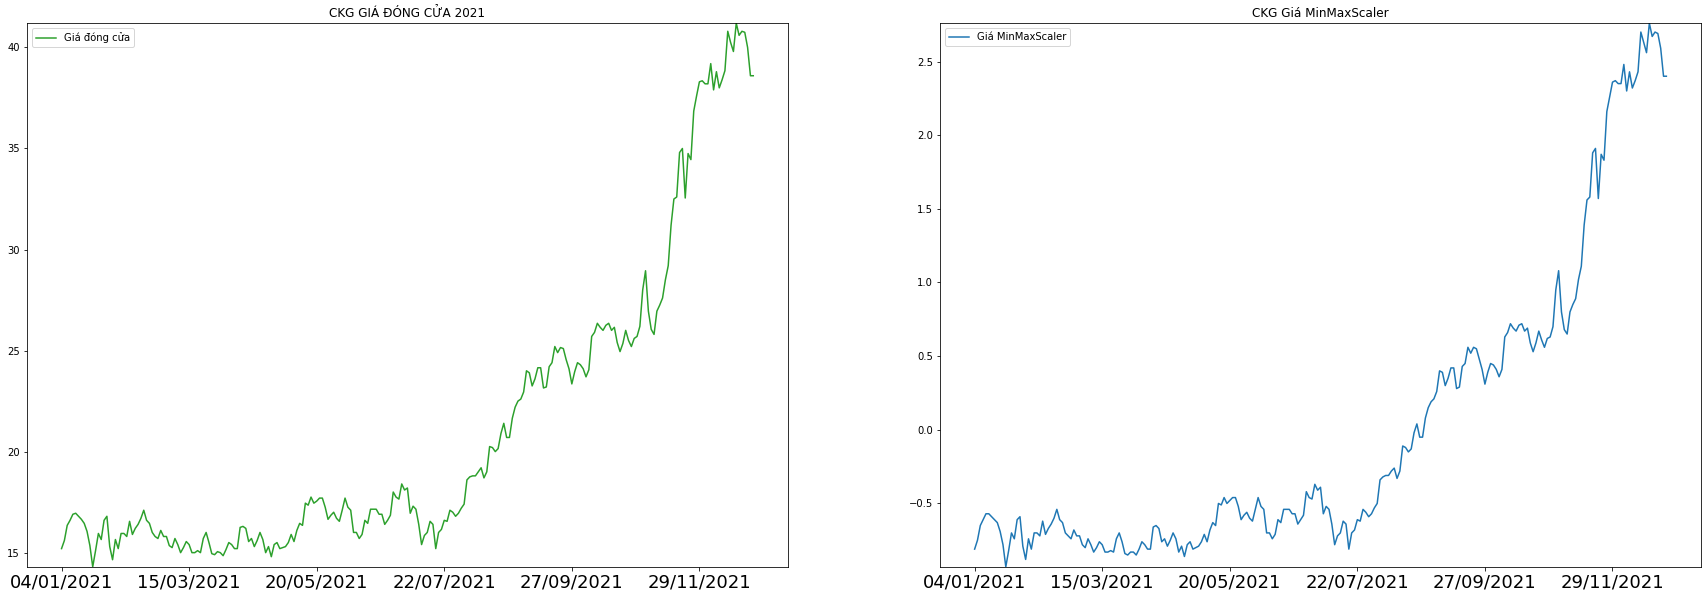

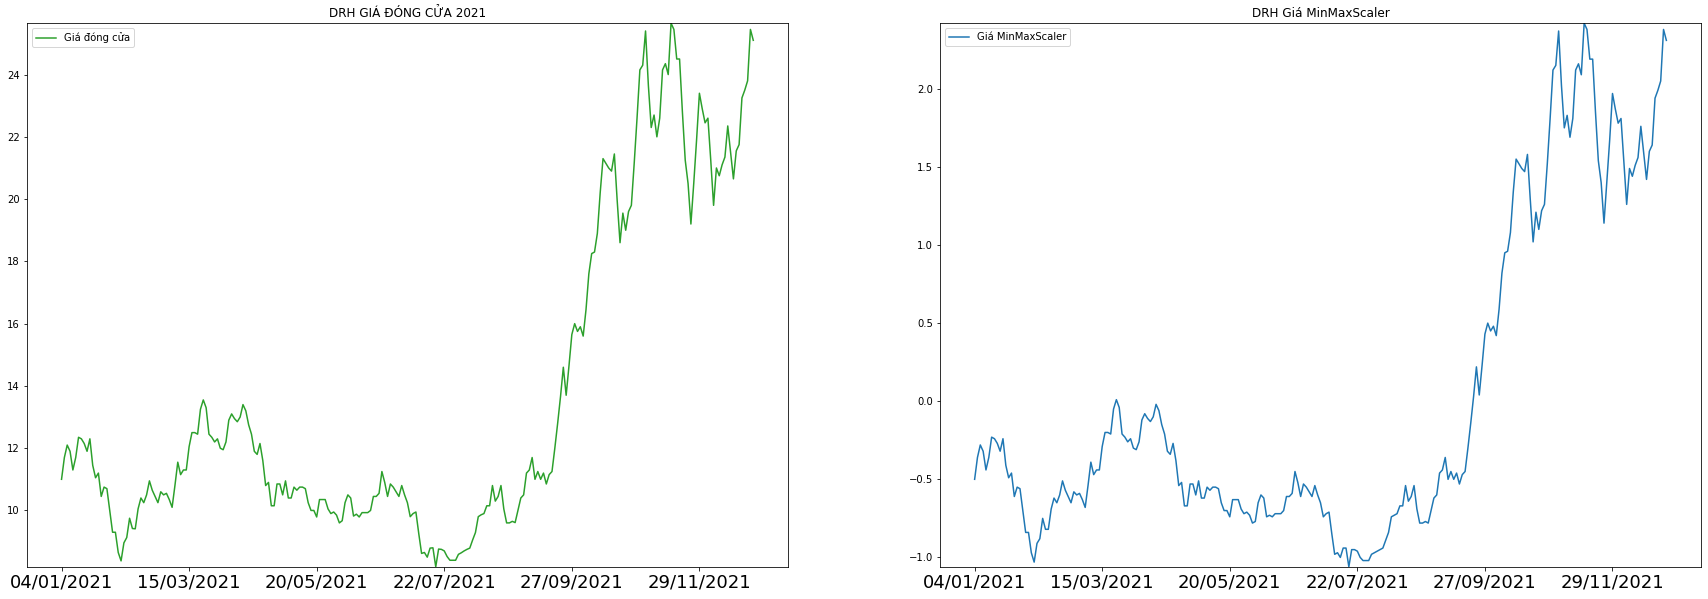

In [67]:
#Chọn index các mã stock và tiến hành plot
index_plot = [10, 20, 30, 40, 50]
for index in index_plot:
  plot_price_stock(df_stock[stock_symbols[index]])


### StandardScaler

In [68]:
for symbol in stock_symbols:
    df_stock[symbol] = pre_processing_option(df_stock[symbol], method='StandardScaler')


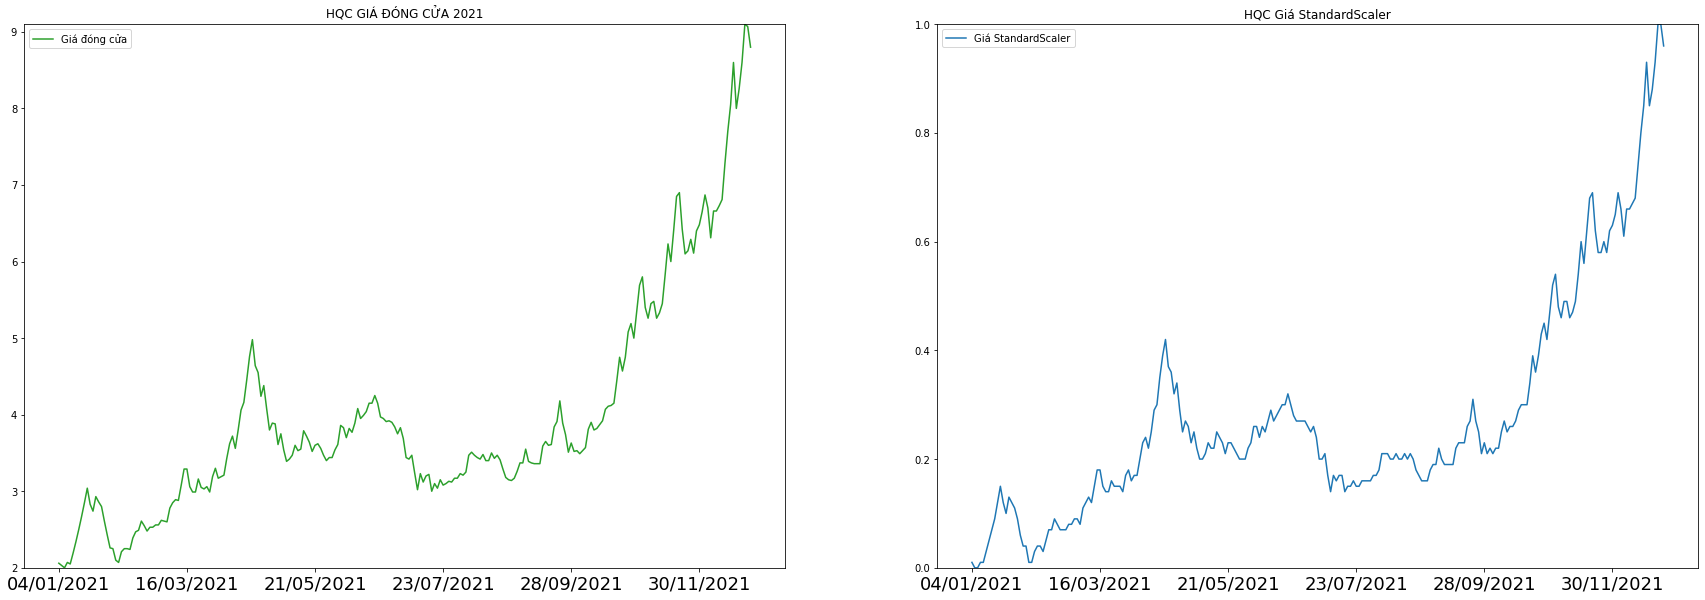

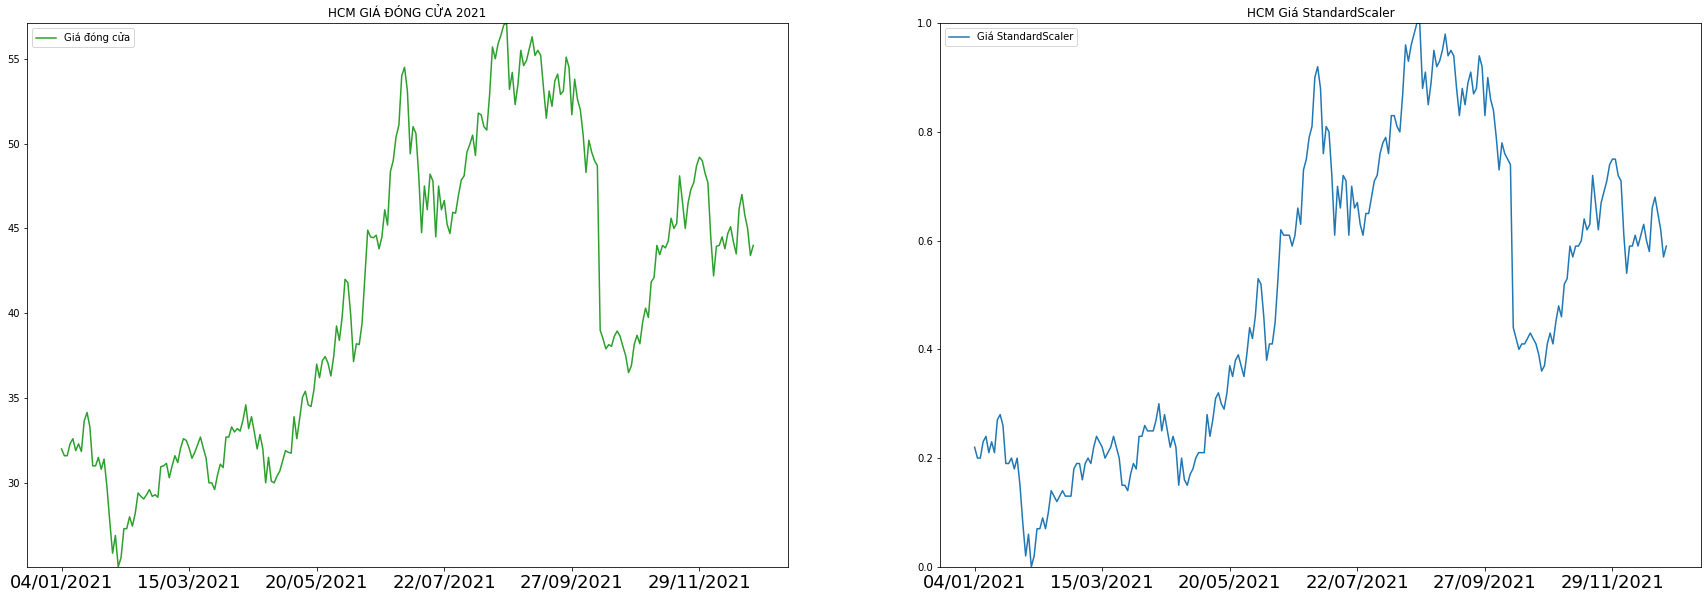

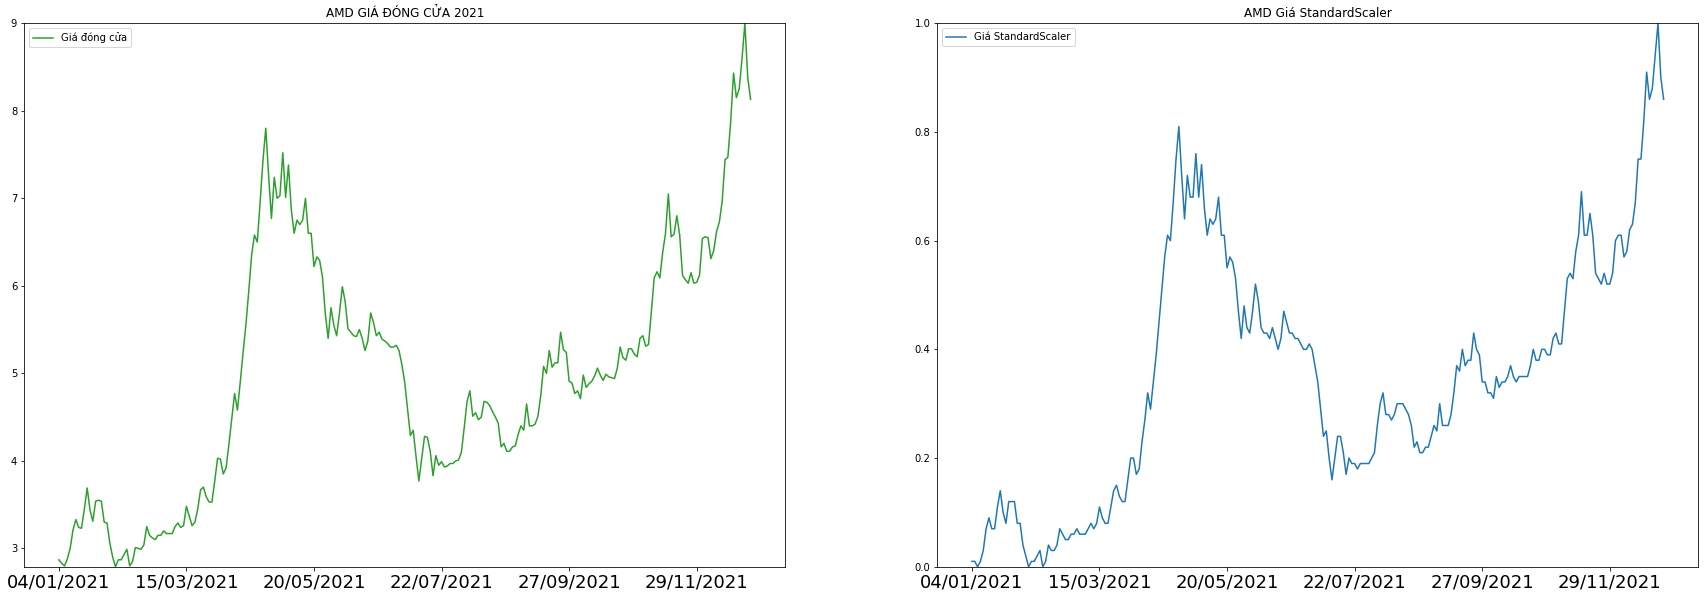

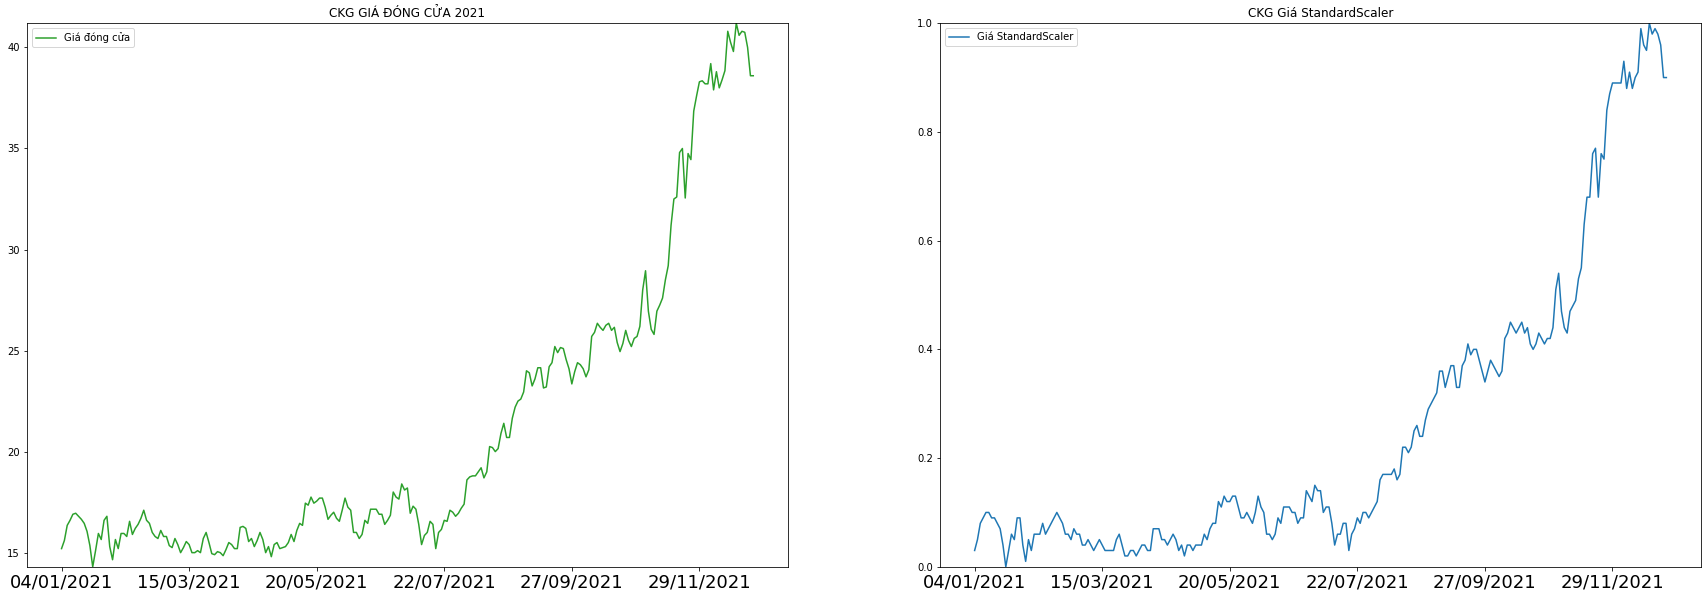

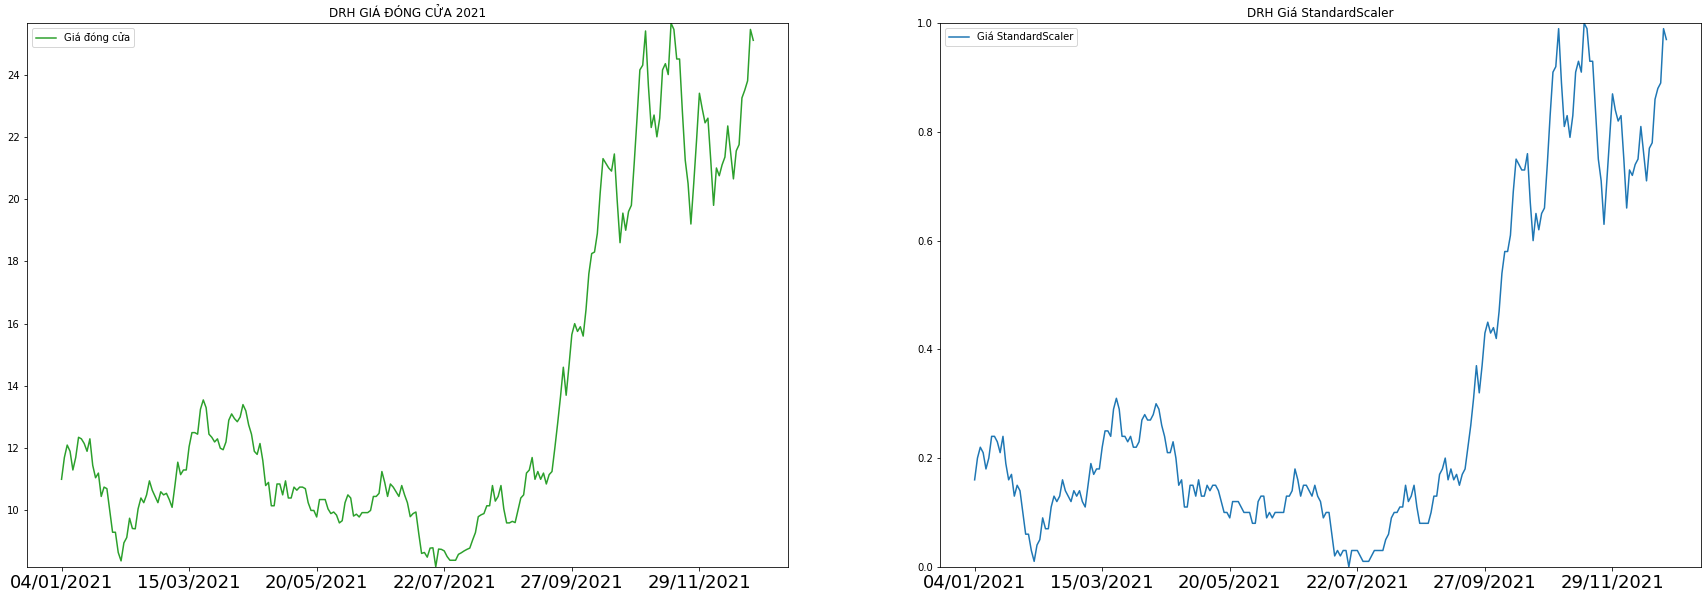

In [69]:
for index in index_plot:
  plot_price_stock(df_stock[stock_symbols[index]], method='StandardScaler')

In [70]:
df_stock[stock_symbols[12]]

,Mã CK,Ngày,Giá đóng cửa,Giá scaler,Giá MinMaxScaler,Giá StandardScaler
0,SCR,24/12/2021,22.10,2.87,2.87,0.93
1,SCR,23/12/2021,22.00,2.84,2.84,0.92
2,SCR,22/12/2021,23.20,3.17,3.17,1.00
3,SCR,21/12/2021,22.75,3.04,3.04,0.97
4,SCR,20/12/2021,21.65,2.75,2.75,0.90
...,...,...,...,...,...,...
240,SCR,08/01/2021,9.48,-0.55,-0.55,0.12
241,SCR,07/01/2021,9.29,-0.60,-0.60,0.11
242,SCR,06/01/2021,9.10,-0.65,-0.65,0.10
243,SCR,05/01/2021,9.10,-0.65,-0.65,0.10


## Task 3. (5 points) Clustering

In [71]:
#Hàm tạo train data dựa trên giá đã tiền xử lý scaler

def make_train_data(df_stock, stock_symbols):
  X_train = pd.DataFrame()
  days =  df_stock[stock_symbols[0]]['Ngày'][::-1]
  X_train = X_train.append(days)

  for symbol in stock_symbols:
    data_row = df_stock[symbol]['Giá scaler'][::-1]
    data_row = data_row.rename(symbol)
    X_train = X_train.append(data_row)

  X_train.columns = X_train.iloc[0]
  X_train = X_train.iloc[:, ::-1] 
  X_train = X_train[1:]
  return X_train

In [72]:
#Tạo train data và xử lý các giá trị null
#Dùng TimeSeriesResampler để tạo Sampler cho clustering

X_train = make_train_data(df_stock, stock_symbols)
X_train_test = X_train.fillna(0)
X_train_test = TimeSeriesResampler(sz=100).fit_transform(X_train_test)
sz = X_train_test.shape[1]

X_train[:5]

Ngày,04/01/2021,05/01/2021,06/01/2021,07/01/2021,08/01/2021,11/01/2021,12/01/2021,13/01/2021,14/01/2021,15/01/2021,18/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,25/01/2021,26/01/2021,27/01/2021,28/01/2021,29/01/2021,01/02/2021,02/02/2021,03/02/2021,04/02/2021,05/02/2021,08/02/2021,09/02/2021,17/02/2021,18/02/2021,19/02/2021,22/02/2021,23/02/2021,24/02/2021,25/02/2021,26/02/2021,01/03/2021,02/03/2021,03/03/2021,04/03/2021,05/03/2021,...,01/11/2021,02/11/2021,03/11/2021,04/11/2021,05/11/2021,08/11/2021,09/11/2021,10/11/2021,11/11/2021,12/11/2021,15/11/2021,16/11/2021,17/11/2021,18/11/2021,19/11/2021,22/11/2021,23/11/2021,24/11/2021,25/11/2021,26/11/2021,29/11/2021,30/11/2021,01/12/2021,02/12/2021,03/12/2021,06/12/2021,07/12/2021,08/12/2021,09/12/2021,10/12/2021,13/12/2021,14/12/2021,15/12/2021,16/12/2021,17/12/2021,20/12/2021,21/12/2021,22/12/2021,23/12/2021,24/12/2021
STB,-1.83,-1.79,-1.72,-1.62,-1.41,-1.25,-1.31,-1.38,-1.25,-1.02,-1.13,-1.45,-1.50,-1.27,-1.28,-1.42,-1.70,-1.90,-2.17,-1.98,-2.16,-1.92,-1.72,-1.82,-1.66,-1.86,-1.69,-1.55,-1.59,-1.56,-1.59,-1.54,-1.64,-1.61,-1.64,-1.47,-1.46,-1.50,-1.64,-1.56,...,0.24,0.25,0.53,0.43,0.48,0.52,0.58,0.66,0.49,0.58,0.54,0.57,0.56,0.48,0.53,0.74,0.67,1.12,1.16,1.21,0.99,0.76,0.99,0.85,0.56,0.33,0.57,0.69,0.75,0.69,0.70,0.58,0.64,0.69,0.62,0.70,0.60,0.48,0.42,0.60
HPG,-1.39,-1.38,-1.31,-1.31,-1.31,-1.26,-0.95,-0.98,-1.02,-1.01,-1.00,-1.51,-1.49,-1.07,-1.16,-1.15,-1.39,-1.73,-2.21,-1.93,-2.07,-1.70,-1.44,-1.48,-1.36,-1.63,-1.48,-1.19,-1.13,-1.19,-1.20,-1.22,-1.17,-1.07,-0.83,-0.72,-0.64,-0.62,-0.77,-0.76,...,0.90,0.87,0.89,1.01,1.06,1.09,1.04,0.84,0.61,0.72,0.54,0.27,0.17,-0.08,-0.41,-0.30,-0.15,-0.30,-0.20,-0.23,-0.35,-0.25,-0.24,-0.31,-0.47,-0.80,-0.48,-0.55,-0.57,-0.67,-0.66,-0.47,-0.45,-0.50,-0.64,-0.60,-0.74,-0.91,-0.94,-0.75
VRE,0.20,0.82,0.78,1.05,1.65,2.27,2.10,1.91,2.06,2.10,2.34,2.32,2.14,2.06,2.17,2.51,2.21,1.25,0.35,0.35,-0.42,0.31,0.74,0.56,0.59,-0.08,0.16,0.99,1.40,1.27,1.14,1.23,0.97,0.99,0.78,1.18,1.35,1.65,1.29,1.29,...,0.01,-0.10,0.22,0.16,0.03,-0.10,-0.27,-0.08,-0.31,-0.38,-0.35,-0.40,-0.25,-0.01,-0.23,-0.46,-0.37,-0.01,-0.10,-0.27,-0.37,-0.50,-0.53,-0.55,-1.14,-1.17,-0.44,-0.38,-0.25,-0.29,-0.25,-0.35,-0.27,-0.38,-0.12,-0.03,0.10,0.14,-0.05,0.05
FLC,-2.14,-2.17,-2.21,-2.19,-2.19,-2.09,-2.00,-2.04,-2.03,-1.95,-1.83,-1.91,-1.96,-1.85,-1.72,-1.59,-1.45,-1.30,-1.47,-1.62,-1.76,-1.63,-1.61,-1.65,-1.51,-1.65,-1.55,-1.45,-1.58,-1.65,-1.57,-1.63,-1.66,-1.65,-1.58,-1.52,-1.65,-1.51,-1.50,-1.58,...,0.43,0.51,0.35,0.35,0.46,0.68,0.68,0.61,0.84,0.90,1.21,1.08,1.13,1.46,1.75,1.43,1.17,1.20,1.49,1.31,1.28,1.15,1.43,1.26,1.13,1.12,1.17,1.23,1.36,1.26,1.61,1.53,1.69,2.05,1.92,2.23,2.24,2.42,2.08,2.10
VIC,0.04,0.17,0.20,0.20,0.32,0.48,0.52,0.27,0.22,0.28,0.21,-0.36,-0.31,-0.18,-0.19,-0.20,-0.45,-0.56,-1.09,-0.61,-0.64,-0.12,0.00,-0.19,0.00,-0.49,-0.10,0.04,0.19,0.11,0.17,0.19,0.05,0.11,0.11,0.08,0.05,-0.04,-0.04,-0.09,...,-0.88,-0.88,-0.92,-0.94,-0.94,-0.95,-0.95,-0.95,-0.95,-0.98,-0.94,-0.95,-0.84,-0.98,-0.95,-0.95,-0.95,-1.01,-1.01,-0.68,-0.16,-0.19,-0.11,-0.02,-0.15,-0.14,-0.06,-0.12,-0.04,-0.33,-0.32,-0.38,-0.56,-0.56,-0.41,-0.64,-0.71,-0.59,-0.86,-0.83


In [73]:
#Hàm reshape mảng 3D -> 2D
def reshape3D_2D(arr):
  return arr.reshape(arr.shape[0], arr.shape[1])

In [74]:
#Hàm vẽ elbow clustering -> Chọn k phù hợp

def elbow(X_train_test, model, method):
  distortions = []
  inertias = []
  mapping1 = {}
  mapping2 = {}
  K = range(1, 8)
  
  for k in K:
      # Building and fitting the model
      kmeanModel = model.set_params(n_clusters = k)
      kmeanModel.fit(X_train_test)
  
      distortions.append(sum(np.min(cdist(reshape3D_2D(X_train_test), reshape3D_2D(kmeanModel.cluster_centers_),
                                          'euclidean'), axis=1)) / X_train_test.shape[0])
      inertias.append(kmeanModel.inertia_)
  
      mapping1[k] = sum(np.min(cdist(reshape3D_2D(X_train_test), reshape3D_2D(kmeanModel.cluster_centers_),
                                    'euclidean'), axis=1)) / X_train_test.shape[0]
      mapping2[k] = kmeanModel.inertia_

  plt.plot(K, distortions, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Distortion')
  plt.title('Elbow for ' + method)
  plt.show()

In [75]:
#Hàm vẽ clustering

def plot_clustering(k, y_pred, model, title):
  plt.figure(figsize=(30, 20))
  for yi in range(k):
      plt.subplot(k, k, yi + 1)
      for xx in X_train_test[y_pred == yi]:
          plt.plot(xx.ravel(), "k-", alpha=.2)
      plt.plot(model.cluster_centers_[yi].ravel(), "r-")
      plt.xlim(0, sz)
      plt.ylim(-4, 4)
      plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
              transform=plt.gca().transAxes)
      if yi == 1:
          plt.title(title)

### Standard Euclidean k-means

108.903 --> 69.602 --> 69.602 --> 
85.867 --> 49.442 --> 49.129 --> 49.129 --> 
76.525 --> 41.327 --> 40.085 --> 39.893 --> 38.995 --> 38.411 --> 37.957 --> 37.898 --> 37.898 --> 
68.890 --> 39.148 --> 37.470 --> 34.614 --> 33.579 --> 33.507 --> 33.507 --> 
64.410 --> 35.591 --> 34.091 --> 33.715 --> 33.297 --> 32.257 --> 31.547 --> 31.394 --> 31.394 --> 
50.995 --> 30.562 --> 28.222 --> 28.222 --> 
43.067 --> 28.282 --> 26.856 --> 26.856 --> 


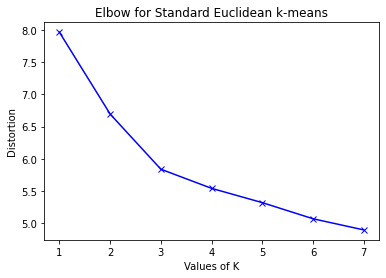

In [76]:
seed = 0
km = TimeSeriesKMeans(verbose=True, random_state=seed)

elbow(X_train_test, km, 'Standard Euclidean k-means')

76.525 --> 41.327 --> 40.085 --> 39.893 --> 38.995 --> 38.411 --> 37.957 --> 37.898 --> 37.898 --> 


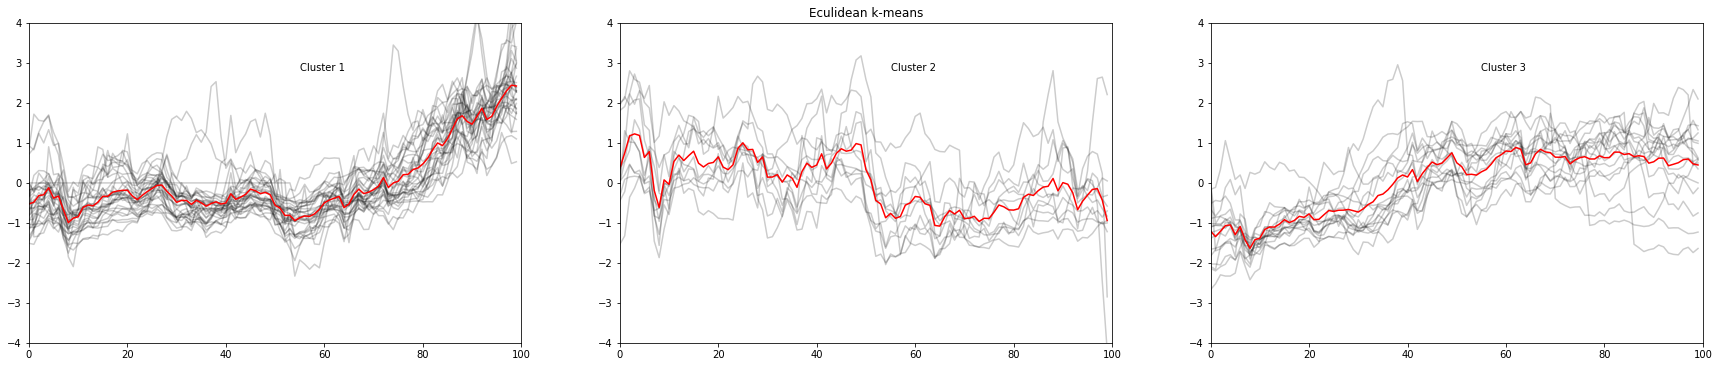

In [77]:
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train_test)
plot_clustering(3, y_pred, km, "Eculidean k-means")

### Soft-DTW k-means

8316.994 --> 540.648 --> 540.966 --> 539.841 --> 539.976 --> 539.679 --> 539.529 --> 539.484 --> 539.396 --> 539.449 --> 539.330 --> 539.397 --> 539.280 --> 539.353 --> 539.233 --> 539.306 --> 539.171 --> 539.255 --> 539.102 --> 539.162 --> 539.012 --> 539.009 --> 538.812 --> 538.613 --> 538.293 --> 538.157 --> 538.099 --> 538.202 --> 538.134 --> 538.198 --> 538.132 --> 538.202 --> 538.121 --> 538.192 --> 538.059 --> 538.169 --> 538.017 --> 538.124 --> 537.997 --> 538.092 --> 537.986 --> 538.064 --> 537.969 --> 538.040 --> 537.948 --> 538.012 --> 537.921 --> 537.977 --> 537.887 --> 537.941 --> 
1426.544 --> 215.180 --> 214.520 --> 214.698 --> 214.900 --> 214.465 --> 214.677 --> 214.449 --> 214.605 --> 214.430 --> 214.530 --> 214.380 --> 214.516 --> 214.370 --> 214.475 --> 214.328 --> 214.470 --> 214.341 --> 214.435 --> 214.342 --> 214.414 --> 214.328 --> 214.406 --> 214.332 --> 214.386 --> 214.314 --> 214.382 --> 214.283 --> 214.378 --> 214.207 --> 214.386 --> 214.251 --> 214.328 --> 2

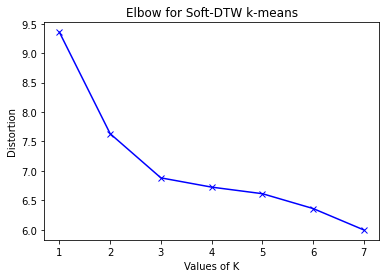

In [78]:
sdtw_km = TimeSeriesKMeans(metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)

elbow(X_train_test, sdtw_km, 'Soft-DTW k-means')

477.854 --> 136.886 --> 131.700 --> 130.660 --> 130.654 --> 130.691 --> 130.617 --> 130.649 --> 130.538 --> 130.581 --> 130.510 --> 130.536 --> 130.490 --> 130.513 --> 130.482 --> 130.509 --> 130.484 --> 130.502 --> 130.487 --> 130.483 --> 130.486 --> 130.489 --> 130.486 --> 130.486 --> 130.477 --> 130.478 --> 130.468 --> 130.451 --> 130.438 --> 130.414 --> 130.408 --> 130.403 --> 130.346 --> 130.366 --> 130.333 --> 130.355 --> 130.341 --> 130.340 --> 130.332 --> 130.337 --> 130.320 --> 130.311 --> 130.305 --> 130.300 --> 130.230 --> 130.260 --> 130.212 --> 130.235 --> 130.216 --> 130.230 --> 


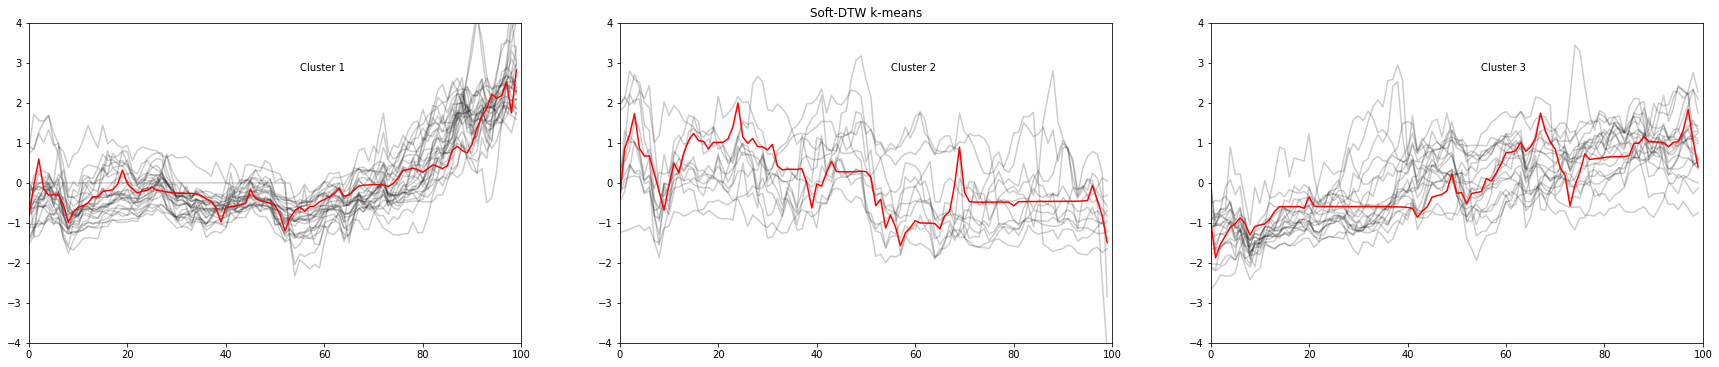

In [79]:
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train_test)
plot_clustering(3, y_pred, sdtw_km, "Soft-DTW k-means")

### DBA k-means

Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


62.396 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


20.607 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


20.602 --> 20.602 --> 
Init 2
57.677 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


20.823 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


19.941 --> 19.941 --> 
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished


32.307 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished


13.475 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


13.366 --> 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


13.366 --> 
Init 2


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished


65.814 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished


15.360 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished


14.749 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished


13.741 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished


12.686 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


12.398 --> 12.398 --> 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished



Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


20.560 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


10.117 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


9.951 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


9.951 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


25.954 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


12.305 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


11.584 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


11.129 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


10.918 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


10.899 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


10.899 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Init 1


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.1s finished


18.658 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.2s finished


9.333 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.1s finished


9.333 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.1s finished


16.520 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.1s finished


9.267 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.1s finished


9.267 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Init 1


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


15.378 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


8.145 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


8.145 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


14.943 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


8.219 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


7.788 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


7.737 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


7.737 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Init 1


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished


13.883 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished


7.308 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7.234 --> 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7.234 --> 
Init 2


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished


11.665 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished


7.748 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7.419 --> 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7.399 --> 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7.399 --> 


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Init 1


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.2s finished


11.853 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.2s finished


6.799 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6.723 --> 

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6.723 --> 
Init 2


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.2s finished


12.922 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.3s finished


7.844 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.3s finished


7.314 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.3s finished


7.106 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6.785 --> 

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6.775 --> 

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6.775 --> 


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    0.2s finished


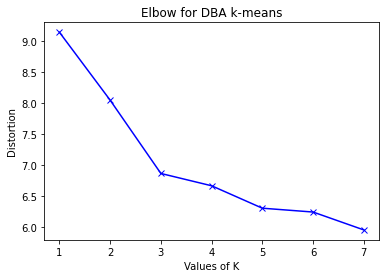

In [80]:
dba_km = TimeSeriesKMeans(n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)

elbow(X_train_test, dba_km, 'DBA k-means')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


20.560 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


10.117 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


9.951 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


9.951 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.1s finished


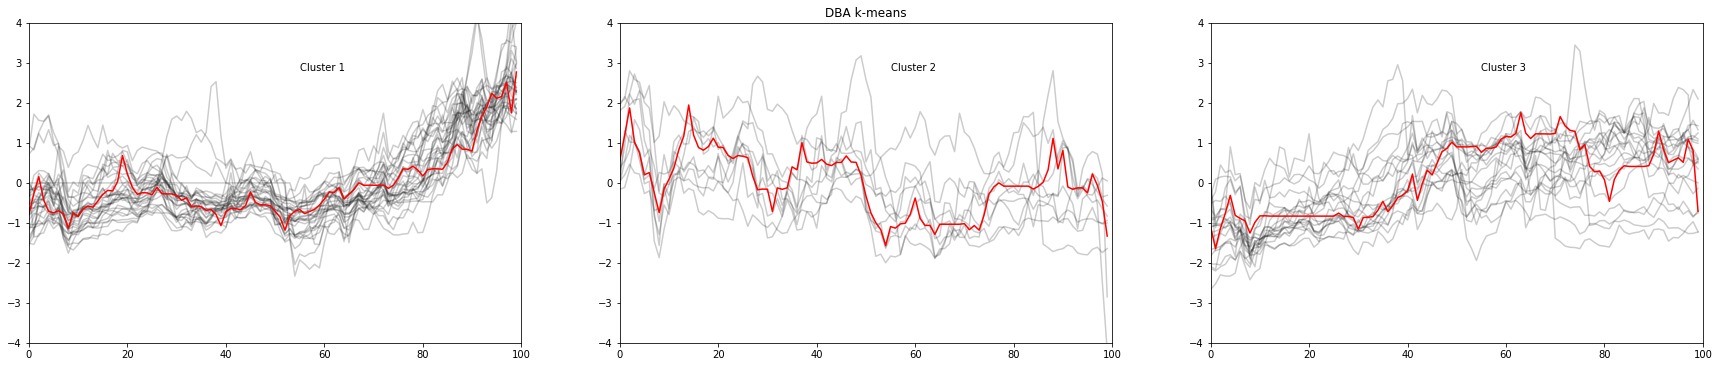

In [81]:
dba_km = TimeSeriesKMeans(n_clusters=3,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train_test)
plot_clustering(3, y_pred, dba_km, "DBA k-means")